In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut
from sklearn.metrics import accuracy_score,make_scorer,f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [3]:
data = pd.read_csv("D:\Titanic survival Prediction\Titanic-Dataset.csv")

In [4]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.drop(["PassengerId","Name","Cabin","Ticket"],inplace=True,axis=1)

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
data["Embarked"].replace(["C","S","Q"],["Cherbourg","Southampton","Queenstown"])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 889, dtype: object

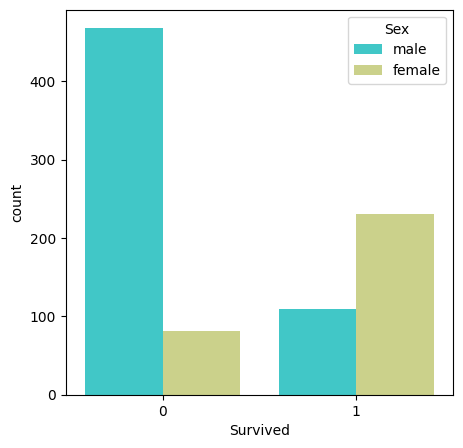

In [12]:
#Does Gender effect survival?
plt.figure(figsize=(5, 5))
sns.countplot(x="Survived",data=data, hue="Sex",palette="rainbow")
plt.show()

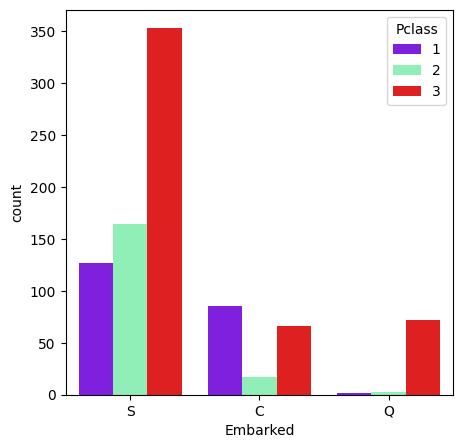

In [13]:
plt.figure(figsize=(5, 5))
sns.countplot(x="Embarked",data=data, hue="Pclass",palette="rainbow")
plt.show()

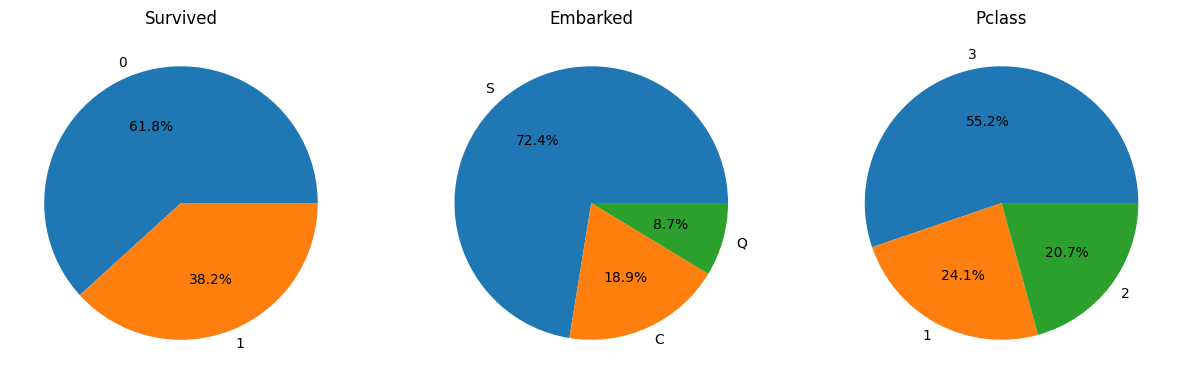

In [14]:
plt.figure(figsize=(15,12))
for i,col in enumerate(['Survived','Embarked','Pclass']):
    plt.subplot(1,3,i+1)
    x=data[col].value_counts().reset_index()
    plt.title(f"{col}")
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%")


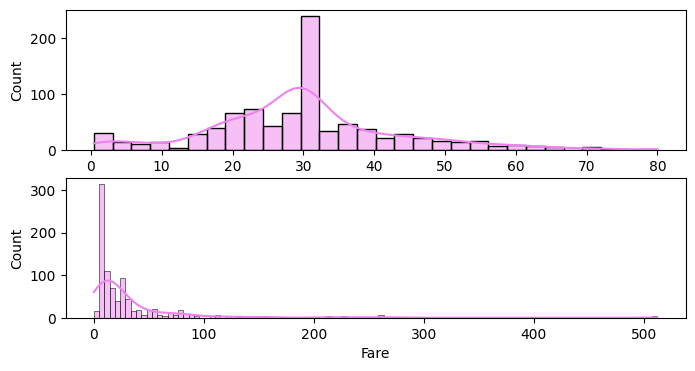

In [15]:
plt.figure(figsize=(8,4))
for i,col in enumerate(['Age','Fare']):
    plt.subplot(2,1,i+1)
    sns.histplot(data=data,x=col,kde=True,color="violet")

In [16]:
#Average age of passengers who survived vs those who didn't
data.groupby("Survived")["Age"].mean()

Survived
0    30.4151
1    28.4236
Name: Age, dtype: float64

In [17]:
#Average Fare of passengers who survived vs those who didn't
data.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.209498
Name: Fare, dtype: float64

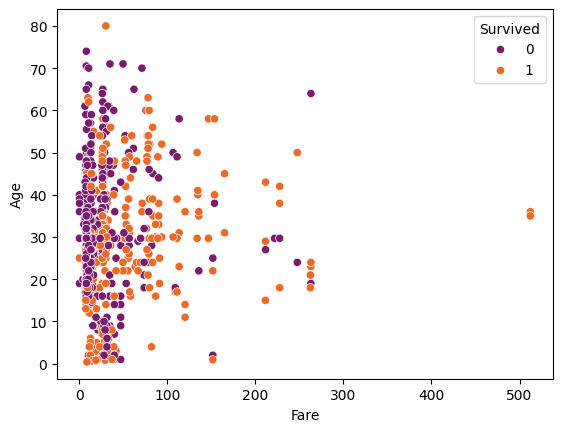

In [18]:
sns.scatterplot(data=data, x="Fare", y="Age", hue="Survived", palette="inferno")
plt.legend(title="Survived")
plt.show()

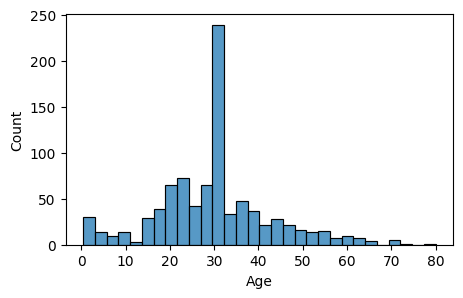

In [19]:
plt.figure(figsize=(5,3))
sns.histplot(x="Age",data=data,palette="rainbow")
plt.show()

In [20]:
df=pd.get_dummies(data,["sex","Embarked"])
data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [21]:
#def one_hot_encoding(data=None):
#   dummy = pd.get_dummies(data[["Sex","Embarked"]],dtype=int)
#   dummy_data = pd.concat([dummy,data],axis=1).drop(columns=['Sex','Embarked']).reset_index(drop=True)
#   return dummy_data
#data_model = one_hot_encoding(data)
#data_model

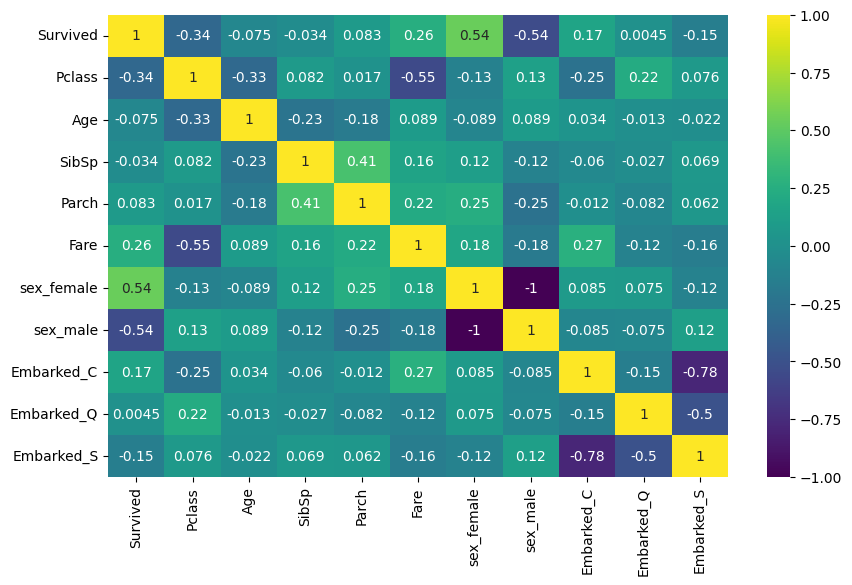

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()